# Load libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
df=pd.read_csv("C:/Users/smart/Downloads/Salary_Data.csv")

In [78]:
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [79]:
##x=df[["YearsExperience","Age"]]
x=df.iloc[:,:2]
y=df.iloc[:,2]

In [80]:
print(x)


    YearsExperience   Age
0               1.1  21.0
1               1.3  21.5
2               1.5  21.7
3               2.0  22.0
4               2.2  22.2
5               2.9  23.0
6               3.0  23.0
7               3.2  23.3
8               3.2  23.3
9               3.7  23.6
10              3.9  23.9
11              4.0  24.0
12              4.0  24.0
13              4.1  24.0
14              4.5  25.0
15              4.9  25.0
16              5.1  26.0
17              5.3  27.0
18              5.9  28.0
19              6.0  29.0
20              6.8  30.0
21              7.1  30.0
22              7.9  31.0
23              8.2  32.0
24              8.7  33.0
25              9.0  34.0
26              9.5  35.0
27              9.6  36.0
28             10.3  37.0
29             10.5  38.0


In [81]:
print(y)

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: Salary, dtype: int64


# split dataset

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=25,random_state=0)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [86]:
x_pred=reg.predict(x_train)
y_pred=reg.predict(x_test)

In [87]:
print("Training score: ",reg.score(x_train,x_pred))
print("testing score: ",reg.score(x_test,y_test))

Training score:  1.0
testing score:  0.8400824641638021


# Polynomial regression

In [88]:
data=pd.read_csv("C:/Users/smart/Downloads/Position Salary.csv")

In [89]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# input=level output=salary

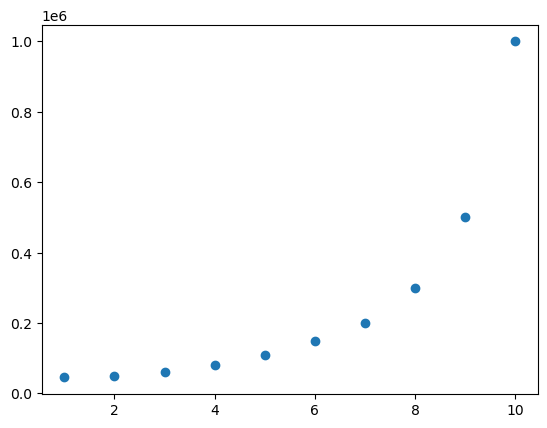

In [90]:
plt.scatter(data["Level"],data["Salary"])

In [91]:
x=data.iloc[:,1:2]
y=data.iloc[:,2]

In [92]:
print(x)

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10


In [93]:
print(y)

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


# let's check for linear regression

In [94]:
reg1=LinearRegression()

In [95]:
reg1.fit(x,y)

LinearRegression()

In [96]:
y_pred=reg1.predict(x)
y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

In [97]:
##Solve for negartive values

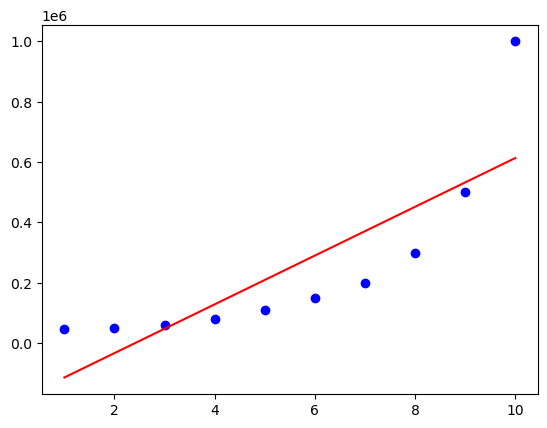

In [98]:
plt.scatter(x,y,color="blue")
plt.plot(x,y_pred,color="red")

In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [100]:
poly=PolynomialFeatures(degree=5)
x_poly=poly.fit_transform(x)

In [101]:
x_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [102]:
reg2=LinearRegression()
reg2.fit(x_poly,y)

LinearRegression()

In [103]:
y_pred1=reg2.predict(x_poly)

In [104]:
y_pred1

array([ 43895.10489603,  53836.82983718,  57065.26806579,  77286.71328745,
       112263.40326412, 152736.59673702, 201349.65034962, 291571.09557056,
       506617.71561662, 998377.62237564])

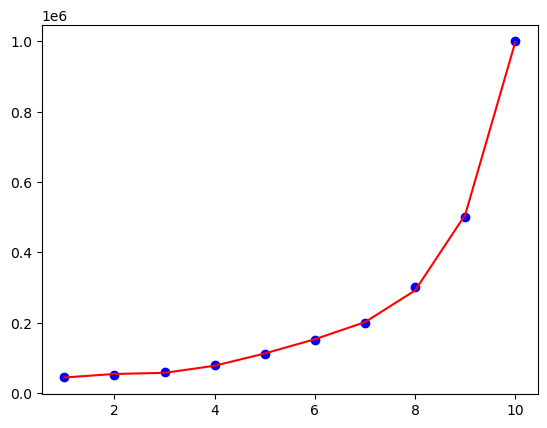

In [105]:
plt.scatter(x,y,color="blue")
plt.plot(x,y_pred1,color="red")